# Input packages and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('airline_delays.csv')
data = data.drop(columns="Unnamed: 0")

# Preprocessing


In [3]:
data=data.drop_duplicates()
data.head(5)

,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,0,10,EARLY_MORNING,1,7,187,American Airlines Inc.,11493,75591,479,...,7,Seattle International,47.447,-122.306,NONE,0.16,0.0,0.0,52.0,4.92
1,0,4,MORNING,1,95,180,Delta Air Lines Inc.,11493,80026,2509,...,0,Seattle International,47.447,-122.306,NONE,0.16,0.0,0.0,52.0,4.92
2,0,4,MORNING,1,95,160,Delta Air Lines Inc.,11493,80026,2509,...,18,Seattle International,47.447,-122.306,NONE,0.16,0.0,0.0,52.0,4.92
3,0,5,MORNING,1,95,160,Delta Air Lines Inc.,11493,80026,2509,...,18,Seattle International,47.447,-122.306,NONE,0.16,0.0,0.0,52.0,4.92
4,0,7,MORNING,1,95,132,Delta Air Lines Inc.,11493,80026,2509,...,18,Seattle International,47.447,-122.306,NONE,0.16,0.0,0.0,52.0,4.92


In [4]:
airlinecolumn = ['DEP_DEL15','DEP_BLOCK','AIRLINE_AIRPORT_FLIGHTS_MONTH','PREVIOUS_AIRPORT','AIRLINE_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS']
airlinedata = data[airlinecolumn]
airlinedata.nunique()

DEP_DEL15                          2
DEP_BLOCK                          6
AIRLINE_AIRPORT_FLIGHTS_MONTH    509
PREVIOUS_AIRPORT                 324
AIRLINE_FLIGHTS_MONTH             17
AVG_MONTHLY_PASS_AIRLINE          17
FLT_ATTENDANTS_PER_PASS           14
GROUND_SERV_PER_PASS              17
dtype: int64

In [17]:
airlinedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51995 entries, 0 to 52703
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DEP_DEL15                      51995 non-null  int64  
 1   DEP_BLOCK                      51995 non-null  object 
 2   AIRLINE_AIRPORT_FLIGHTS_MONTH  51995 non-null  int64  
 3   PREVIOUS_AIRPORT               51995 non-null  object 
 4   AIRLINE_FLIGHTS_MONTH          51995 non-null  int64  
 5   AVG_MONTHLY_PASS_AIRLINE       51995 non-null  int64  
 6   FLT_ATTENDANTS_PER_PASS        51995 non-null  float64
 7   GROUND_SERV_PER_PASS           51995 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 5.6+ MB


In [18]:
airlinedata.describe()

,DEP_DEL15,AIRLINE_AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS
count,51995.000000,51995.000000,51995.000000,5.199500e+04,51995.000000,51995.000000
mean,0.198077,3304.006154,60118.951149,1.441869e+06,0.000509,0.000708
std,0.398554,4024.147760,32878.134649,9.267225e+05,0.000458,0.000264
min,0.000000,1.000000,7018.000000,1.050860e+05,0.000000,0.000033
25%,0.000000,602.000000,24691.000000,5.350680e+05,0.000170,0.000541
50%,0.000000,2048.000000,69699.000000,1.539321e+06,0.000338,0.000616
75%,0.000000,4681.000000,80026.000000,2.338195e+06,0.000768,0.000911
max,1.000000,19461.000000,107849.000000,2.447530e+06,0.001759,0.001265


<AxesSubplot:xlabel='DEP_DEL15', ylabel='count'>

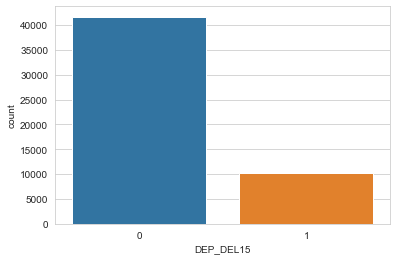

In [19]:
#Apakah data imbalance?

sns.set_style('whitegrid')
sns.countplot(x=data['DEP_DEL15'],data=airlinedata)

# Graph

## Percentage

### AIRLINE_FLIGHTS_MONTH

In [10]:
ALFM = pd.crosstab(index=airlinedata["AIRLINE_FLIGHTS_MONTH"], 
                           columns=airlinedata["DEP_DEL15"])
ALFM

DEP_DEL15,0,1
AIRLINE_FLIGHTS_MONTH,,
7018,605,85
7688,140,40
10417,613,159
12322,1037,292
17358,1554,442
17541,1231,235
20838,1721,407
22992,1023,228
24047,1555,492


In [11]:
ALFMPercent = ALFM[(ALFM[1]/(ALFM[0]+ALFM[1]))>0.25]
for i in ALFMPercent[0].keys():
    tempt0 = ALFMPercent[0][i]
    tempt1 = ALFMPercent[1][i]
    ALFMPercent[0][i] =  tempt0*100/(tempt0+tempt1)
    ALFMPercent[1][i] =  tempt1*100/(tempt0+tempt1)
ALFMPercent

C:\Users\user\AppData\Local\Temp/ipykernel_8160/1906409955.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ALFMPercent[0][i] =  tempt0*100/(tempt0+tempt1)
C:\Users\user\AppData\Local\Temp/ipykernel_8160/1906409955.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ALFMPercent[1][i] =  tempt1*100/(tempt0+tempt1)


DEP_DEL15,0,1
AIRLINE_FLIGHTS_MONTH,,
25366,73,26


In [12]:
ALFMPercent = ALFM[(ALFM[1]/(ALFM[0]+ALFM[1]))>0.25]
for i in ALFMPercent[0].keys():
    print(str(i)+" : "+str(ALFMPercent[0][i]*100/(ALFMPercent[0][i]+ALFMPercent[1][i]))+
          " "+str(ALFMPercent[1][i]*100/(ALFMPercent[0][i]+ALFMPercent[1][i])))

25366 : 73.05458768873403 26.94541231126597


### AVG_MONTHLY_PASS_AIRLINE

In [14]:
AMPAL = pd.crosstab(index=airlinedata["AVG_MONTHLY_PASS_AIRLINE"], 
                           columns=airlinedata["DEP_DEL15"])
AMPAL

DEP_DEL15,0,1
AVG_MONTHLY_PASS_AIRLINE,,
105086,613,159
182290,605,85
229242,1231,235
238627,1258,464
247455,1023,228
253299,1555,492
265983,140,40
307525,2057,344
403856,1037,292


In [15]:
AMPALPercent = AMPAL[(AMPAL[1]/(AMPAL[0]+AMPAL[1]))>0.25]
for i in AMPALPercent[0].keys():
    tempt0 = AMPALPercent[0][i]
    tempt1 = AMPALPercent[1][i]
    AMPALPercent[0][i] =  tempt0*100/(tempt0+tempt1)
    AMPALPercent[1][i] =  tempt1*100/(tempt0+tempt1)
AMPALPercent

C:\Users\user\AppData\Local\Temp/ipykernel_8160/2851738096.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMPALPercent[0][i] =  tempt0*100/(tempt0+tempt1)
C:\Users\user\AppData\Local\Temp/ipykernel_8160/2851738096.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMPALPercent[1][i] =  tempt1*100/(tempt0+tempt1)


DEP_DEL15,0,1
AVG_MONTHLY_PASS_AIRLINE,,
238627,73,26


In [16]:
AMPALPercent = AMPAL[(AMPAL[1]/(AMPAL[0]+AMPAL[1]))>0.25]
for i in AMPALPercent[0].keys():
    print(str(i)+" : "+str(AMPALPercent[0][i]*100/(AMPALPercent[0][i]+AMPALPercent[1][i]))+
          " "+str(AMPALPercent[1][i]*100/(AMPALPercent[0][i]+AMPALPercent[1][i])))

238627 : 73.05458768873403 26.94541231126597


### FLT_ATTENDANTS_PER_PASS

In [21]:
FAPP = pd.crosstab(index=airlinedata["FLT_ATTENDANTS_PER_PASS"], 
                           columns=airlinedata["DEP_DEL15"])
FAPP

DEP_DEL15,0,1
FLT_ATTENDANTS_PER_PASS,,
0.000000,4422,1114
0.000006,2057,344
0.000041,1554,442
0.000063,140,40
0.000170,3993,828
0.000174,1721,407
0.000338,7533,2211
0.000504,6100,1645
0.000532,1037,292


In [22]:
FAPPPercent = FAPP[(FAPP[1]/(FAPP[0]+FAPP[1]))>0.25]
for i in FAPPPercent[0].keys():
    tempt0 = FAPPPercent[0][i]
    tempt1 = FAPPPercent[1][i]
    FAPPPercent[0][i] =  tempt0*100/(tempt0+tempt1)
    FAPPPercent[1][i] =  tempt1*100/(tempt0+tempt1)
FAPPPercent

C:\Users\user\AppData\Local\Temp/ipykernel_8160/3369345291.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FAPPPercent[0][i] =  tempt0*100/(tempt0+tempt1)
C:\Users\user\AppData\Local\Temp/ipykernel_8160/3369345291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FAPPPercent[1][i] =  tempt1*100/(tempt0+tempt1)


DEP_DEL15,0,1
FLT_ATTENDANTS_PER_PASS,,
0.001759,73,26


In [23]:
FAPPPercent = FAPP[(FAPP[1]/(FAPP[0]+FAPP[1]))>0.25]
for i in FAPPPercent[0].keys():
    print(str(i)+" : "+str(FAPPPercent[0][i]*100/(FAPPPercent[0][i]+FAPPPercent[1][i]))+
          " "+str(FAPPPercent[1][i]*100/(FAPPPercent[0][i]+FAPPPercent[1][i])))

0.0017590171016133 : 73.05458768873403 26.94541231126597


## Violin Plot

In [ ]:
sns.violinplot(x=datagraph.DEP_DEL15 , y=datagraph.DISTANCE_GROUP)

In [ ]:
sns.violinplot(x=datagraph.DEP_DEL15 , y=datagraph.SEGMENT_NUMBER)

In [ ]:
sns.violinplot(x=datagraph.DEP_DEL15 , y=datagraph.CONCURRENT_FLIGHTS)

In [ ]:
sns.violinplot(x=datagraph.DEP_DEL15 , y=datagraph.NUMBER_OF_SEATS)

In [ ]:
sns.violinplot(x=datagraph.DEP_DEL15 , y=datagraph.AIRLINE_AIRPORT_FLIGHTS_MONTH)

In [ ]:
sns.violinplot(x=datagraph.DEP_DEL15 , y=datagraph.AVG_MONTHLY_PASS_AIRPORT)

In [ ]:
sns.violinplot(x=datagraph.DEP_DEL15 , y=datagraph.AVG_MONTHLY_PASS_AIRLINE)

In [ ]:
sns.violinplot(x=datagraph.DEP_DEL15 , y=datagraph.FLT_ATTENDANTS_PER_PASS)

In [ ]:
sns.violinplot(x=datagraph.DEP_DEL15 , y=datagraph.GROUND_SERV_PER_PASS)

In [ ]:
sns.violinplot(x=datagraph.DEP_DEL15 , y=datagraph.PLANE_AGE)

In [ ]:
sns.violinplot(x=datagraph.DEP_DEL15 , y=datagraph.PRCP)

In [ ]:
sns.violinplot(x=datagraph.DEP_DEL15 , y=datagraph.SNOW)

In [ ]:
sns.violinplot(x=datagraph.DEP_DEL15 , y=datagraph.SNWD)

In [ ]:
sns.violinplot(x=datagraph.DEP_DEL15 , y=datagraph.TMAX)

In [ ]:
sns.violinplot(x=datagraph.DEP_DEL15 , y=datagraph.AWND)